# Pytorch

https://pytorch.org/
https://pytorch.org/tutorials/
https://pytorch.org/docs/stable/index.html

Pytorch es un framework de machine learning que nos permite rápidamente diseñar, entrenar y testear modelos de machine learning (en particular, redes neuronales). 

Vamos a utilizar este framework para implementar el obligatorio del curso, por eso, en la clase de hoy vamos a ver una breve introduccion al framework y las redes neuronales. Vamos a prestar detallada atencion a dos tipos de modelos: las redes FeedForward (neuronas que se conectan entre sí en una modalidad de "cascada secuencial").

In [29]:
import torch
import numpy as np

In [30]:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [31]:
torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

tensor([[1, 2, 3],
        [4, 5, 6]])

In [32]:
torch.zeros([2, 4], dtype=torch.int32)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

### Manipulación de tensores.
Los tensores pueden accederse mediante las directivas de slicing y e indexación de python

In [33]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x[1][2])
x[0][1] = 8
print(x)

tensor(6)
tensor([[1, 8, 3],
        [4, 5, 6]])


### Operaciones sobre tensores.

In [34]:
x = torch.tensor([1., 2., 3.])
y = torch.tensor(2)
z = torch.randn(1, 3)

In [35]:
# Suma tensor y un escalar
x + y

tensor([3., 4., 5.])

In [36]:
# Tensor por escalar
x * y

tensor([2., 4., 6.])

In [37]:
# Tensor por escalar
x / y

tensor([0.5000, 1.0000, 1.5000])

In [38]:
r = torch.mv(z, x)
r

tensor([-1.3317])

In [39]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 4)
r = torch.mm(mat1, mat2)
r

tensor([[ 0.2218, -0.5748,  0.1802,  0.3137],
        [ 1.5227, -1.6034, -2.1553,  0.4971]])

### Metadata

In [40]:
w = torch.tensor([[1,2,3],[4,5,6]])
print(w.size())                      
print(torch.numel(w))

torch.Size([2, 3])
6


### Resizing (reshaping)

In [41]:
x = torch.randn(2, 3)   
print('Size of x:', x.size())
y = x.view(6) 
print('Size of y:', y.size())
z = x.view(-1, 2) 
print('Size of z:', z.size())

Size of x: torch.Size([2, 3])
Size of y: torch.Size([6])
Size of z: torch.Size([3, 2])


### Cálculo de gradientes
Pytorch habilita al cálculo automático de gradientes (autograd)

In [42]:
x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)
print(x.grad)
out = x.pow(2).mean()
print(out)
out.backward()

print(x.grad)

None
tensor(1., grad_fn=<MeanBackward0>)
tensor([[ 0.5000, -0.5000],
        [ 0.5000,  0.5000]])


In [62]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=8484504703b02b2108e745758bad6c58203f04f3ae472650bb10c30621622f69
  Stored in directory: /root/.cache/pip/wheels/27/01/9a/eda4eb8c3d5ea66e652137ad7feb65759a98f4b8bcd128a96b
Successfully built torchviz


In [63]:
from torchviz import make_dot
# make_dot(out)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Uso automático de GPU

En Colab tenemos 12 Horas de GPU gratis para usar (cambiando el runtime type), esto nos permite entrenar modelos de DL mucho mas rápido. La celda de código abajo detecta si tenemos una GPU disponible o no y nos va a permitir escribir código genérico para cualquier dispositivo.

***
Recomendamos fuertemente utilizar CPU lo más posible mientras probamos código y usar la GPU solo para cuando sabemos que todo funciona y queremos obtener resultados. 

In [45]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

cuda:0


In [46]:
x = torch.rand(2, 900000).cpu()            # Initialize with random number (uniform distribution)
y = torch.randn(900000,200).cpu()           # With normal distribution (SD=1, mean=0)
z = torch.randperm(200).cpu()           # Size 200. Random permutation of integers from 0 to 200

print('CPU time:')
%timeit torch.mm(x,y)+z

x = torch.rand(2, 900000).cuda()            
y = torch.randn(900000,200).cuda()          
z = torch.randperm(200).to(DEVICE)  # Manda al tensor al dispositivo que le pasamos (en este caso cuda:0)

print(' ')
print('GPU time:')
%timeit torch.mm(x,y)+z

CPU time:
52.2 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
 
GPU time:
1.88 ms ± 3.13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## FeedForward networks

Son la unidad más simple de red neuronal, con su origen en el perceptron de muchas capas. La idea es crear una secuencia lineal de neuronas (capa) que reciben nuestro input. 

![Image](https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png)

De esta manera la primera capa de neuronas (input layer) recibe los datos y las capas subsiguientes reciben el resultados de capas anteriores. La última capa (output layer) es la encargada de generar una predicción a partir de nuestros inputs.

***

En este notebook vamos a usar un dataset muy simple y conocido de imágenes, Fashion-MNIST. Se trata de un dataset de ropa y calzado, la idea es usar redes neuronales para clasificar cada una de las imágenes el tipo de ropa que representa. 

Para trabajar con imagenes vamos a hacer uso de una librería complementaria a Pytorch: **torchvision** (https://pytorch.org/docs/stable/torchvision/index.html) que incluye varios datasets precargados, modelos preentrenados y algunas utilidades para trabajar con imágenes que nos van a resultar útiles.

*** 

En la celda de abajo vamos a carga nuestro dataset y mostrar algunas imagenes de ejemplo.


Tamaño del dataset 60000 imagenes.
Clases posibles: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Objeto imagen: <PIL.Image.Image image mode=L size=28x28 at 0x7FB76872D310> - Clase 9
Detalles de la imagen (28, 28) pixeles


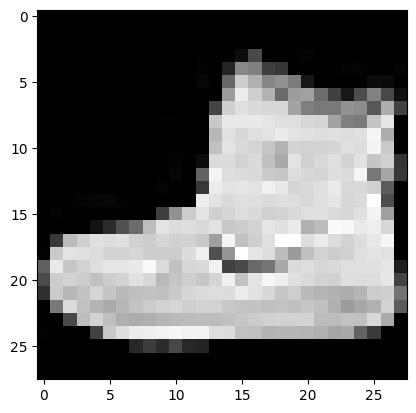

In [71]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

mnist_dataset = datasets.FashionMNIST("ruta_donde_guardar_datos", download=True)

print(f"Tamaño del dataset {len(mnist_dataset)} imagenes.")
print(f"Clases posibles: {mnist_dataset.classes}")

data_idx = 0  # Indice (0-59999) de la imagen que queremos ver
image, label = mnist_dataset[0] 

print(f"Objeto imagen: {image} - Clase {label}")
print(f"Detalles de la imagen {image.size} pixeles")

plt.imshow(image, cmap='gray')
plt.show()

### Clasificador

Ahora que tenemos una idea de como es nuestro dataset, vamos a crear un modelo FeedForward para predecir la clase de la imagen que usemos como input. 

Antes que nada, vamos a necesitar dividir el dataset total en conjuntos de **entrenamiento**, **validacion** y **test**. Vamos a usar un ratio de 80 y 20% respectivamente. El set de test se puede descargar por separado con torchvision. Además, vamos a necesitar una manera de cargar **batches** de datos a la vez, para entrenar nuestra red. Pytorch nos proporciona varias ayudas para esto.

***

Finalmente, queda aclarar el uso de **tranformaciones** sobre las imágenes. Por lo pronto, tenemos objetos de tipo PIL Image, necesitamos (al menos) convertirlos en Tensores, para que Pytorch los pueda manejar.

Hay un numero inmenso de transformaciones posibles que podemos usar en nustras imagenes, en este caso basta con tranformarlas a tensores, pero dejamos este link para otros casos: https://pytorch.org/docs/stable/torchvision/transforms.html


In [72]:
#Esto nos permite cambiarle la forma a un tensor aplicandole una transformacion. 

class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        return torch.reshape(img, self.new_size)

In [73]:
import torchvision.transforms as transforms

img_transforms = transforms.Compose([transforms.ToTensor(), ReshapeTransform((-1,))])

# Descargamos los datasets
mnist_train_dataset = datasets.FashionMNIST(
    "ruta_donde_guardar_datos", download=True, train=True, transform=img_transforms
)

# Separamos el train set en train y validation
train_set, val_set = torch.utils.data.random_split(
    mnist_train_dataset,
    [int(0.8 * len(mnist_train_dataset)), int(0.2 * len(mnist_train_dataset))],
)

mnist_test_dataset = datasets.FashionMNIST(
    "ruta_donde_guardar_datos", download=True, train=False, transform=img_transforms
)

# Creamos objetos DataLoader (https://pytorch.org/docs/stable/data.html) que nos va a permitir crear batches de data automaticamente.

# Cuantas imagenes obtener en cada iteracion!
BATCH_SIZE = 64

# Creamos los loaders
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2
)
val_loader = torch.utils.data.DataLoader(
    val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    mnist_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2
)


### Modelo

Vamos a considerar cada imagen como un tensor de una sola dimensión, de largo 28*28 = 784. Cada uno de esos valores representa el valor de un pixel de nuestra imagen original.

Nuestra red va a recibir ese tensor como input (en realidad, un batch de tensores de largo 784) que va a ser trabajado por varias capas ocultas con diferente número de neuronas hasta llegar a una capa de salida con 10 outputs, 1 por cada clase posible.

***

Vamos utilizar capas conectadas totalmente, tambien conocidas como Fully Connected, Dense, o Linear en Pytorch (https://pytorch.org/docs/stable/nn.html). Para crearlas necesitamos especificar las dimensiones del tensor de entrada, y el de salida; luego internamente Pytorch genera la matriz de pesos por los cuales multiplicar la entrada para generar la salida. Luego de cada una de estas operaciones necesitamos usar una funcion de activacion no linear, en este caso, vamos a usar ReLU: https://pytorch.org/docs/stable/nn.html#relu. 

***

Para implementar un modelo **cualquiera** alcanza con definir un metodo **init** donde especificamos la arquitectura del mismo, y un método **forward** donde especificamos cómo interactúan nuestras capas frente a un nuevo input.

***



In [74]:
# Definicion del modelo que vamos a usar. En Pytorch los modelos se definen como clases, que heredan de nn.Module
import torch.nn as nn
import torch.nn.functional as F


class FeedForwardModel(nn.Module):

    def __init__(self, number_classes=10):
        super(FeedForwardModel, self).__init__()
        
        self.linear1 = nn.Linear(784, 128) # (input size - 28x28, output channels - 128)
        self.linear2 = nn.Linear(in_features=128, out_features=64)
        
        self.output = nn.Linear(in_features=64, out_features=number_classes)

    def forward(self, new_input):
        result = F.relu(self.linear1(new_input))
        result = F.relu(self.linear2(result))
        logits = self.output(result)
        return logits 


model = FeedForwardModel(number_classes=10).to(DEVICE)
model

FeedForwardModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [75]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# tensor = tensor.to(device)
device

'cuda'

In [76]:
!pip install torchsummary

In [77]:
from torchsummary import summary
summary(model, (1, 28*28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
            Linear-2                [-1, 1, 64]           8,256
            Linear-3                [-1, 1, 10]             650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42
----------------------------------------------------------------


### Entrenando el modelo

Para entrenar un modelo necesitamos una funcion de costo o pérdida (normalmente referida como loss function: https://pytorch.org/docs/stable/nn.html#loss-functions). En este curso no nos vamos a meter en mucho detalle sobre las funciones de costo, para este ejercicio y el siguiente vamos a usar la CrossEntropyLoss, y cuando necesiten otra la vamos a especificar.

El objetivo de esta funcion es darnos un valor de que tan malas fueron las predicciones del modelo respecto a los valores de verdad. Haciendo uso de backpropagation y del gradiente de esta funcion podemos optimizar los pesos de nuestra red tal que "aprenda" a hacer mejores predicciones. De nuevo, la lógica detras de toda esta optimización no nos compete en este curso y lo dejamos para la disciplina de Deep Learning.

***
Como mencionamos arriba, el costo de computa usando las predicciones del modelo y las etiquetas verdaderas de nuestros datos y, el trabajo de actualizar los pesos usando los gradientes lo realiza un optimizador de Pytorch: https://pytorch.org/docs/stable/optim.html.

Cross-Entropy loss se usa en Clasificación
MAE se usa en regresión. 

In [78]:
import torch.optim as optim

LEARNING_RATE = 0.003

ff_model = FeedForwardModel(number_classes=10).to(DEVICE)
criterion = nn.CrossEntropyLoss().to(DEVICE)
ff_optimizer = optim.SGD(ff_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [79]:
# Acá se responde porque no se debe transformar el target que es un número en un vector.
# Pregunta realizada en clase

loss = nn.CrossEntropyLoss()
input = torch.tensor([1.,0.2,0.3], requires_grad=True)
# el target se puede expresar de dos formas como una distribución entre las clases
#target = torch.tensor([0.,1.,0.])

# O como un indice de la clase objetivo
# Este caso es el que se usa en la función de pérdida en el entrenamiento más abajo.
# Evita tener que convertir el label en un vector de distribución.

# Clase 1 , que es equivalente a la distribución [0.,1.,0.]
target = torch.tensor(1)
output = loss(input, target)
output.backward()
output

tensor(1.4657, grad_fn=<NllLossBackward0>)

In [80]:
# Revisión del cálculo, con la forma de la entroía cruzada
-np.log(np.exp(0.2)/(np.exp(0.2) + np.exp(1) + np.exp(0.3)))

1.4657319272479288

In [87]:
def train_model(model, train_loader, val_loader, loss_func, optimizer, epochs):
    for epoch in range(epochs):
        running_loss = 0.0

        for i,data in enumerate(train_loader):
          images,labels = data # image is the input, label is the target
          images = images.to(device) # send image to GPU
          labels= labels.to(device) # send label to GPU

          optimizer.zero_grad() # zero out the gradients, otherwise they will accumulate between epochs


          predictions = model(images) # forward pass of the model on the image to get predictions

          # We calculate the loss of predictions respect to the truth
          loss = loss_func(predictions, labels)
          loss.backward() # backpropagate the loss

          optimizer.step() # update the parameters
        
          running_loss += loss.item() # add the loss to the running loss

          if i % 500 == 499:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/500))
            running_loss = 0.0
            # Luego de cada epoch de entrenamiento vemos la perfomance (accuracy en el set de validación)
    
        with torch.no_grad(): #don't update weights
            # model.eval() #set model to evaluation mode
            correct_predictions = 0.0
            for i,data in enumerate(val_loader):
              image,label = data # image is the input, label is the target
              image = image.to(device) # send image to GPU
              label = label.to(device) # send label to GPU

              predictions = model(images)
              predictions = torch.argmax(predictions, dim=1) # I do this because I want to compare the predictions with the labels

              # correct_predictions += 0.0 # También podía usar torch.sum(predictions == labels)

              correct_predictions += (predictions == labels).detach().cpu().float().sum().item()

            # correct_predictions_gpu = torch.sum(predictions == labels)

            print(f"Accuracy: {correct_predictions/len(val_loader.dataset)}")
    return model
  
  
    

In [88]:
def test_model(model, test_loader):
    # Reportamos la performance en el test set:
    # Se ejecuta el modelo sin actualizar los pesos
    with torch.no_grad():

      # Predicciones acertadas
      correct_predictions = 0.0

      # Obtener bloques del dataset de test
      for i,data in enumerate(test_loader):

        # Nuestros datos son imagenes y la clase de cada una.
        images,labels = data
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)

        # Realizar predicciones para el bloque
        predictions = model(images)
        # Obtener para cada imagen del bloque la clase más probable.
        predictions = torch.argmax(predictions,dim=1)

        # Calcular total de predicciones correctas y sumarlas al acumulador
        correct_predictions += (predictions == labels).detach().cpu().float().sum().item()

    # Imprimir aciertos sober test
    print(f"Test set accuracy {(100 * correct_predictions / len(test_loader.dataset)):.2f} %")
    # Reportamos la performance en el test set:

In [ ]:
# Usando las funciones definidas arriba entrenar un modelo es trivial

ff_model = train_model(ff_model, train_loader, val_loader, loss_func=criterion, optimizer=ff_optimizer, epochs=15)
test_model(ff_model, test_loader)

[1,   500] loss: 1.302
Accuracy: 0.6893333333333334
[2,   500] loss: 0.589
Accuracy: 0.9243333333333333
[3,   500] loss: 0.498
Accuracy: 0.8616666666666667
[4,   500] loss: 0.453
Accuracy: 0.8146666666666667
[5,   500] loss: 0.435
Accuracy: 0.893
[6,   500] loss: 0.417
Accuracy: 0.9086666666666666
[7,   500] loss: 0.398
Accuracy: 0.8616666666666667
[8,   500] loss: 0.385
Accuracy: 0.8303333333333334
[9,   500] loss: 0.365
Accuracy: 0.8773333333333333
[10,   500] loss: 0.365
Accuracy: 0.9086666666666666
[11,   500] loss: 0.353
Accuracy: 0.752
[12,   500] loss: 0.340
Accuracy: 0.893
[13,   500] loss: 0.335
Accuracy: 0.8616666666666667
[14,   500] loss: 0.324
Accuracy: 0.9086666666666666


In [ ]:
test_model(ff_model, test_loader)

## Tarea 1

Cree y entrene un modelo de red FeedForward que funcione mejor que el visto en clase. Puede usar lo que considere necesario (siempre dentro del mundo de redes feed forward - nada de convoluciones)